#Streamlit Link:

https://animerecommender-t2daecditknro4wxpeewyy.streamlit.app/

#GitHub Link:

https://github.com/nus1985code/anime_recommender.git

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
df = pd.read_csv('/content/anime.csv')


In [46]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#Pre Processing & EDA

In [47]:
print("Anime Data:", df.shape)


Anime Data: (12294, 7)


In [48]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


#Missing Values

In [49]:
print(df.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [50]:
df['genre'] = df['genre'].fillna('Unknown')
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [51]:
print(df.duplicated().sum())

0


In [52]:
df.describe()

,anime_id,rating,members
count,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.017096,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.900000,2.250000e+02
50%,10260.500000,6.550000,1.550000e+03
75%,24794.500000,7.170000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


📊 Key Insights

✅ anime.csv (df): rating: Average is 6.47, max is 10, and min is 1.67.

members: Extremely skewed! Ranges from 5 to over 1 million → needs transformation.

✅ rating.csv (df1): rating: Ranges from -1 to 10. -1 means the user did not rate → we’ll remove these.

#Top 10 Genres

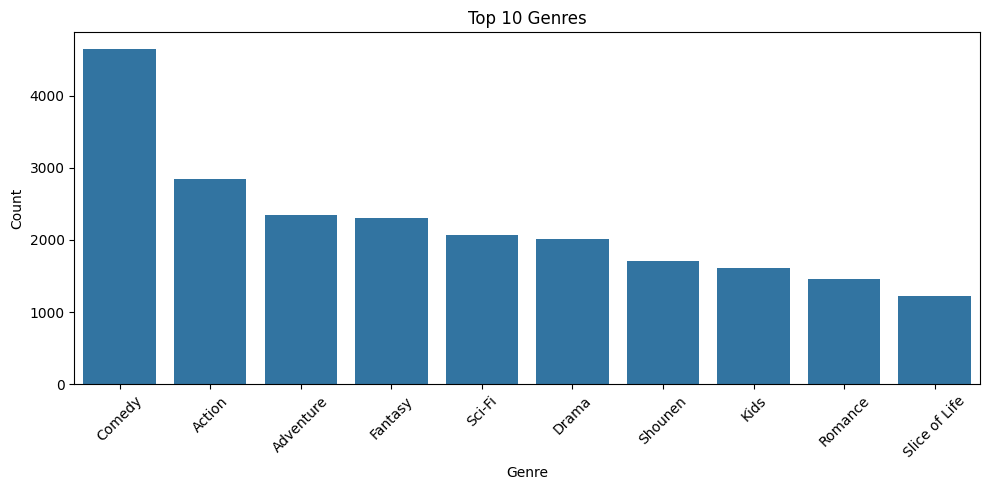

In [53]:
temp_df = df.copy()
top_genres = temp_df['genre'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genres')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [54]:
temp_df = df.copy()
print(temp_df['genre'].str.split(', ').explode().value_counts().head(10))


genre
Comedy           4645
Action           2845
Adventure        2348
Fantasy          2309
Sci-Fi           2070
Drama            2016
Shounen          1712
Kids             1609
Romance          1464
Slice of Life    1220
Name: count, dtype: int64


In [55]:
# Value count
df['type'].value_counts()

,count
type,
TV,3812
OVA,3311
Movie,2348
Special,1676
ONA,659
Music,488


In [56]:
print(df['rating'].describe())

count    12294.000000
mean         6.473902
std          1.017096
min          1.670000
25%          5.900000
50%          6.550000
75%          7.170000
max         10.000000
Name: rating, dtype: float64


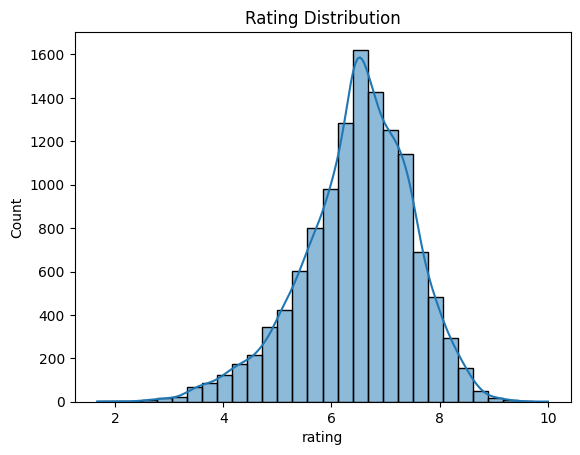

In [57]:
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Rating Distribution')
plt.show()


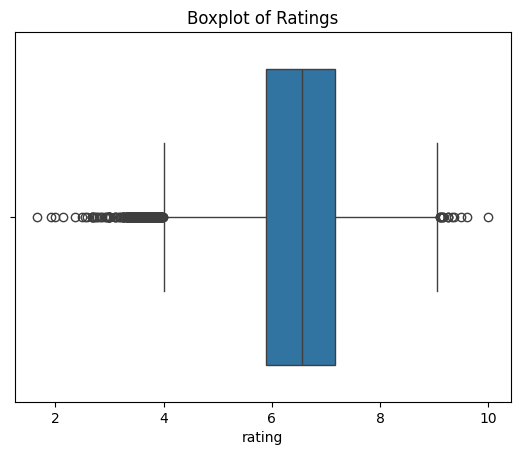

In [58]:
# Boxplot to see outliers
sns.boxplot(x=df['rating'])
plt.title('Boxplot of Ratings')
plt.show()

In [59]:
print(df['members'].describe())

count    1.229400e+04
mean     1.807134e+04
std      5.482068e+04
min      5.000000e+00
25%      2.250000e+02
50%      1.550000e+03
75%      9.437000e+03
max      1.013917e+06
Name: members, dtype: float64


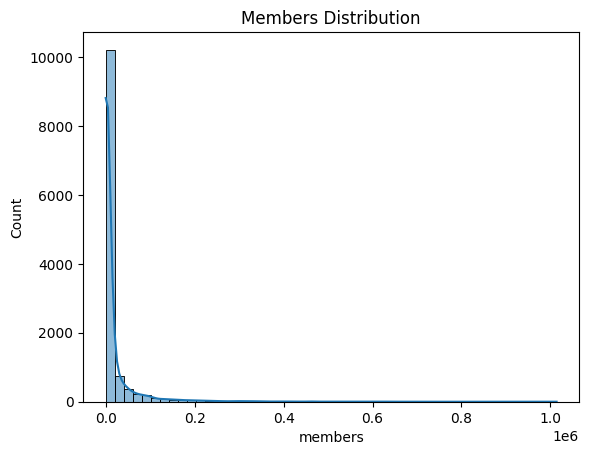

In [60]:
sns.histplot(df['members'], bins=50, kde=True)
plt.title('Members Distribution')
plt.show()

In [61]:
print(df['episodes'].value_counts().head(10))

episodes
1          5677
2          1076
12          816
13          572
26          514
3           505
Unknown     340
4           327
6           268
24          181
Name: count, dtype: int64


In [62]:
print(df.groupby('type')['rating'].mean().sort_values(ascending=False))


type
TV         6.886453
Special    6.523353
OVA        6.375996
Movie      6.321443
ONA        5.652120
Music      5.588996
Name: rating, dtype: float64


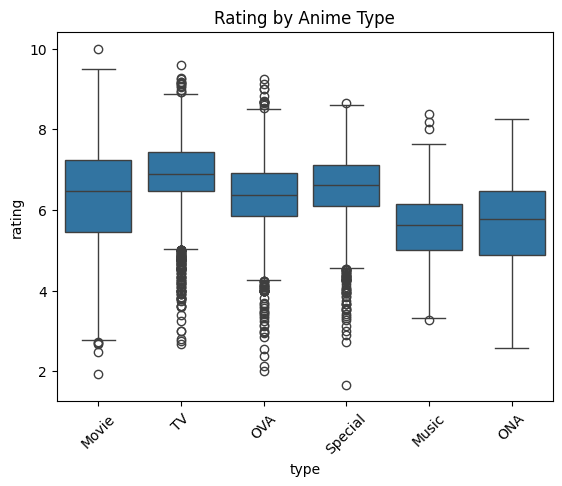

In [63]:
# Boxplot: Rating by Type
sns.boxplot(x='type', y='rating', data=df)
plt.title('Rating by Anime Type')
plt.xticks(rotation=45)
plt.show()

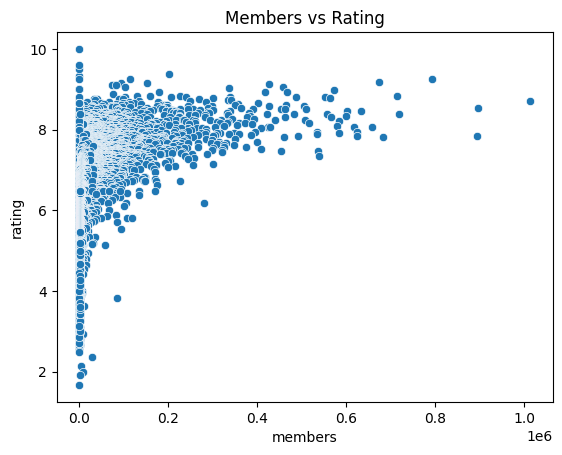

In [64]:
sns.scatterplot(x='members', y='rating', data=df)
plt.title('Members vs Rating')
plt.show()

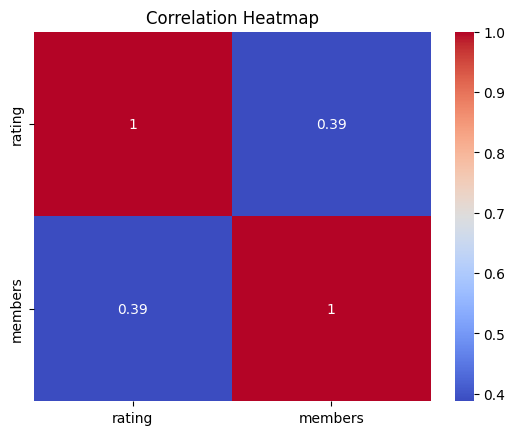

In [65]:
sns.heatmap(df[['rating', 'members']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nRating IQR: {IQR}, Lower Bound: {Q1 - 1.5 * IQR}, Upper Bound: {Q3 + 1.5 * IQR}")


Rating IQR: 1.2699999999999996, Lower Bound: 3.995000000000001, Upper Bound: 9.075


In [67]:
print("\nAverage rating by type:\n", df.groupby('type')['rating'].mean().sort_values(ascending=False))
print("\nMedian rating by type:\n", df.groupby('type')['rating'].median().sort_values(ascending=False))
print("\nCorrelation matrix:\n", df[['rating', 'members']].corr())


Average rating by type:
 type
TV         6.886453
Special    6.523353
OVA        6.375996
Movie      6.321443
ONA        5.652120
Music      5.588996
Name: rating, dtype: float64

Median rating by type:
 type
TV         6.900000
Special    6.620000
Movie      6.473902
OVA        6.380000
ONA        5.770000
Music      5.625000
Name: rating, dtype: float64

Correlation matrix:
            rating   members
rating   1.000000  0.387523
members  0.387523  1.000000


In [68]:
temp_df = df.copy()
top_genres = temp_df['genre'].str.split(', ').explode().value_counts().head(5).index.tolist()

temp_df['genre'] = temp_df['genre'].str.split(', ')
df_exploded = temp_df.explode('genre')

filtered = df_exploded[df_exploded['genre'].isin(top_genres)]

print("\nAvg rating & members for top 5 genres:\n", filtered.groupby('genre')[['rating', 'members']].mean())



Avg rating & members for top 5 genres:
              rating       members
genre                            
Action     6.778672  33570.517750
Adventure  6.738878  19389.737649
Comedy     6.620164  23035.792896
Fantasy    6.667874  24798.887397
Sci-Fi     6.697750  21695.044444


In [69]:
df.groupby('genre')['rating'].mean().sort_values(ascending=False)


,rating
genre,
"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",9.26
"Drama, Fantasy, Romance, Slice of Life, Supernatural",9.06
"Drama, School, Shounen",9.05
"Adventure, Drama, Supernatural",8.93
"Drama, Music, Romance, School, Shounen",8.92
...,...
"Action, Demons, Seinen, Super Power",3.32
"Kids, Mecha",3.26
"Action, Adventure, Sci-Fi, Space, Super Power",3.25



**🎭 Top Genres (by count)**
Comedy (most common) followed by Action, Adventure, and Fantasy.


**📺 Type of Anime**

Most common type: TV (3812 shows), followed by OVA and Movies.

TV shows have the highest average rating (6.88), so they may be considered higher quality.

**⭐ Rating Distribution**

Median rating: 6.55

75% of anime are rated below 7.17

Ratings are slightly right-skewed, but within a reasonable range.

**Outliers:** Any rating below 3.99 or above 9.08 is statistically an outlier (very rare).

**👥 Members (Popularity)**

Extremely skewed:

Median: 1,550

Max: Over 1 million

**🎞️ Episodes**
Nearly half (5677) of all anime have just 1 episode → mostly Movies or Specials.

**📈 Correlation**
rating vs members: 0.39 → moderate positive correlation.

**📊 Genre vs Popularity and Quality**

| Genre         | Avg Rating | Avg Members |
| ------------- | ---------- | ----------- |
| **Action**    | 6.77       | 33,570      |
| **Adventure** | 6.73       | 19,390      |
| **Comedy**    | 6.62       | 23,036      |
| **Fantasy**   | 6.67       | 24,799      |
| **Sci-Fi**    | 6.70       | 21,695      |




#Log Transform members

In [70]:
df['members_log'] = np.log1p(df['members'])
print(df['members_log'].describe())

count    12294.000000
mean         7.425662
std          2.321408
min          1.791759
25%          5.420535
50%          7.346655
75%          9.152499
max         13.829333
Name: members_log, dtype: float64


#Content-Based Filtering-Genre into List + Explode

In [71]:
df['genre'] = df['genre'].str.split(', ')
df = df.explode('genre').reset_index(drop=True)
df['genre'] = df['genre'].astype('category')


In [72]:
df['genre'].unique()

['Drama', 'Romance', 'School', 'Supernatural', 'Action', ..., 'Shoujo Ai', 'Unknown', 'Hentai', 'Yaoi', 'Yuri']
Length: 44
Categories (44, object): ['Action', 'Adventure', 'Cars', 'Comedy', ..., 'Unknown', 'Vampire', 'Yaoi',
                          'Yuri']

# Create tags column- Bag of Words

In [73]:
df['type'] = df['type'].astype(str).str.lower()
df['tags'] = df['genre'].astype(str) + ' ' + df['type'] + ' ' + df['members_log'].astype(str)
print(df[['name', 'tags']].head())

                               name                                   tags
0                    Kimi no Na wa.         Drama movie 12.209222678961282
1                    Kimi no Na wa.       Romance movie 12.209222678961282
2                    Kimi no Na wa.        School movie 12.209222678961282
3                    Kimi no Na wa.  Supernatural movie 12.209222678961282
4  Fullmetal Alchemist: Brotherhood           Action tv 13.584417996817336


In [74]:
df = df.drop_duplicates(subset='anime_id')

#Vectorize using CountVectorizer

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
tag_vectors = vectorizer.fit_transform(df['tags'].fillna(""))

cosine_sim = linear_kernel(tag_vectors, tag_vectors)


# INDEX MAPPING & FUNCTION

In [76]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

def get_tag_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return "Anime not found.", df

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]

    return df['name'].iloc[anime_indices].tolist(), df


In [77]:
import pickle

with open('recommender.pkl', 'wb') as f:
    pickle.dump({
        'df': df,
        'tag_vectors': tag_vectors,
        'cosine_sim': cosine_sim,
        'indices': indices,
        'vectorizer': vectorizer
    }, f)


In [86]:
import bz2
import pickle

# Save with compression
with bz2.BZ2File('recommender.pbz2', 'wb') as f:
    pickle.dump({
        'df': df,
        'tag_vectors': tag_vectors,
        'cosine_sim': cosine_sim,
        'indices': indices,
        'vectorizer': vectorizer
    }, f)


In [78]:
df.sample(10)['name']


,name
10551,Mobile Suit Gundam Seed C.E.73: Stargazer
12023,Shuumatsu no Izetta
16342,Di Gi Charat Tsuyu Specials
31824,Pro Golfer Saru: Kouga Hikyou! Kage no Ninpou ...
27656,Ai Shoujo Pollyanna Story Specials
28665,Fuki to Hiyoko
24333,Install Pilot
33743,Zombie Clay Animation: Life of the Dead
28661,Fujilog (ONA)
5231,Initial D Battle Stage


In [79]:
get_tag_recommendations("Naruto")


(['Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
  'Haikyuu!! Second Season',
  'Hajime no Ippo',
  'Monogatari Series: Second Season',
  'Great Teacher Onizuka',
  'Hajime no Ippo: New Challenger',
  'Bakuman. 3rd Season',
  'Haikyuu!!',
  'Hajime no Ippo: Rising',
  'Kuroko no Basket 3rd Season'],
        anime_id                                               name   genre  \
 0         32281                                     Kimi no Na wa.   Drama   
 4          5114                   Fullmetal Alchemist: Brotherhood  Action   
 11        28977                                           Gintama°  Action   
 18         9253                                        Steins;Gate  Sci-Fi   
 20         9969                                      Gintama&#039;  Action   
 ...         ...                                                ...     ...   
 36342      9316       Toushindai My Lover: Minami tai Mecha-Minami  Hentai   
 36343      5543                                     

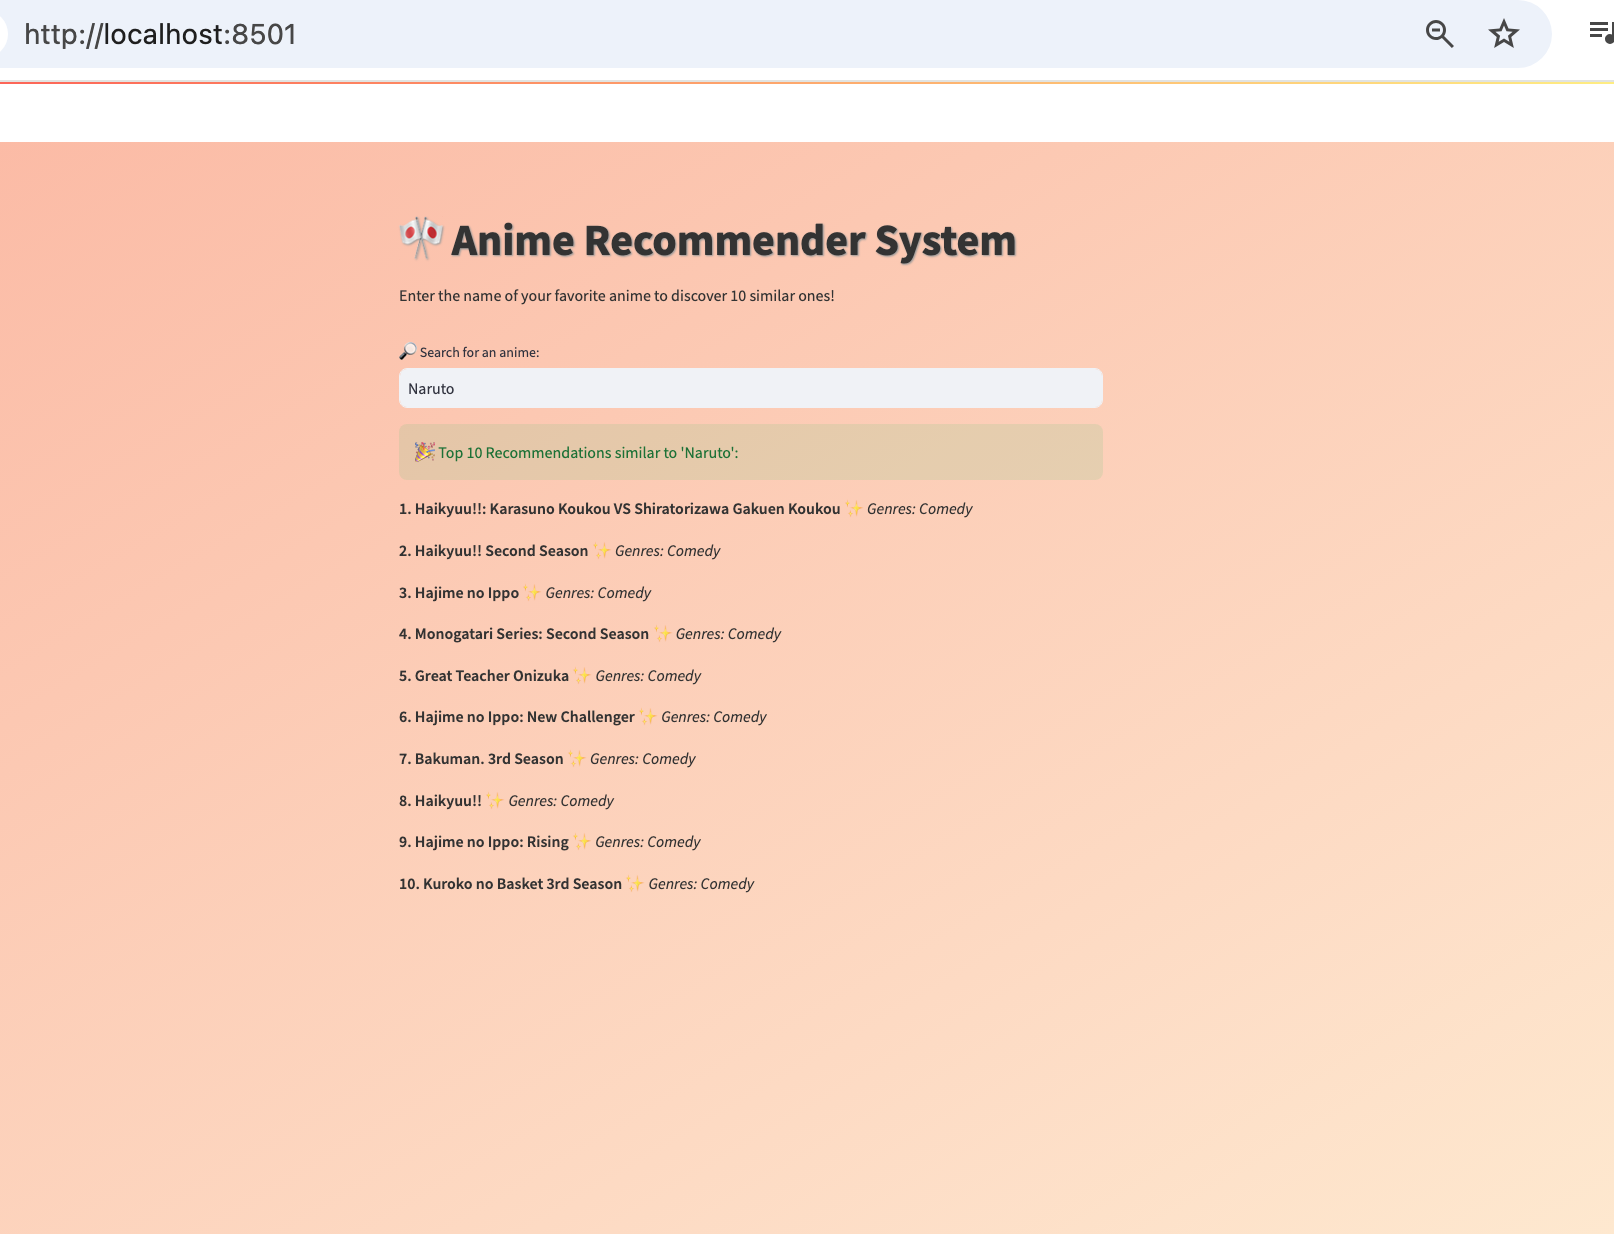

In [83]:
get_tag_recommendations('Mobile Suit Gundam Seed C.E.73: Stargazer')

(['Kuroko no Basket: Saikou no Present Desu',
  'Fate/stay night: Unlimited Blade Works - Prologue',
  'Gintama: Shinyaku Benizakura-hen',
  'Baccano! Specials',
  'One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari',
  'One Piece: Episode of Nami - Koukaishi no Namida to Nakama no Kizuna',
  'Gintama: Jump Festa 2014 Special',
  'Ghost in the Shell: Stand Alone Complex - The Laughing Man',
  'Gintama: Dai Hanseikai',
  'Gintama: Jump Festa 2015 Special'],
        anime_id                                               name   genre  \
 0         32281                                     Kimi no Na wa.   Drama   
 4          5114                   Fullmetal Alchemist: Brotherhood  Action   
 11        28977                                           Gintama°  Action   
 18         9253                                        Steins;Gate  Sci-Fi   
 20         9969                                      Gintama&#039;  Action   
 ...         ...                                   

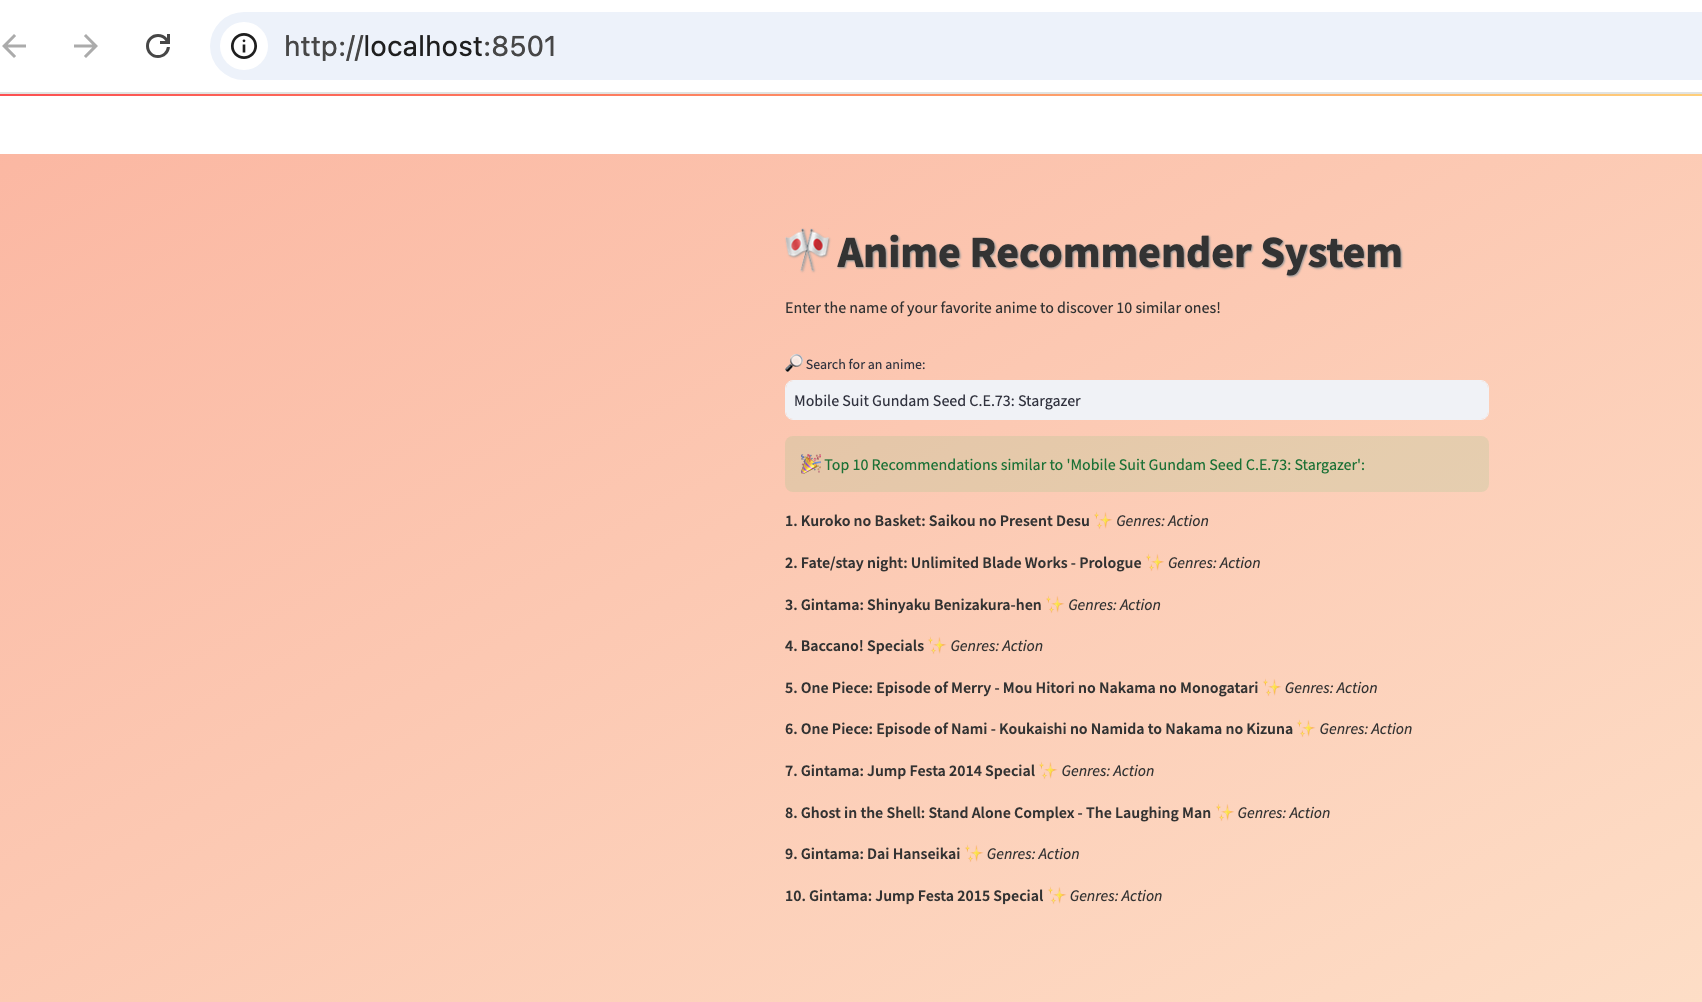

In [82]:
get_tag_recommendations('Hajime no Ippo')

(['Gintama°: Aizome Kaori-hen',
  'Kamisama Hajimemashita: Kako-hen',
  'Kuroshitsuji: Book of Murder',
  'Major: Message',
  'Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku OVA',
  'Hajime no Ippo: Mashiba vs. Kimura',
  'Detroit Metal City',
  'Hidamari Sketch: Sae Hiro Sotsugyou-hen',
  'Sekaiichi Hatsukoi OVA',
  'xxxHOLiC Shunmuki'],
        anime_id                                               name   genre  \
 0         32281                                     Kimi no Na wa.   Drama   
 4          5114                   Fullmetal Alchemist: Brotherhood  Action   
 11        28977                                           Gintama°  Action   
 18         9253                                        Steins;Gate  Sci-Fi   
 20         9969                                      Gintama&#039;  Action   
 ...         ...                                                ...     ...   
 36342      9316       Toushindai My Lover: Minami tai Mecha-Minami  Hentai   
 36343      5543 

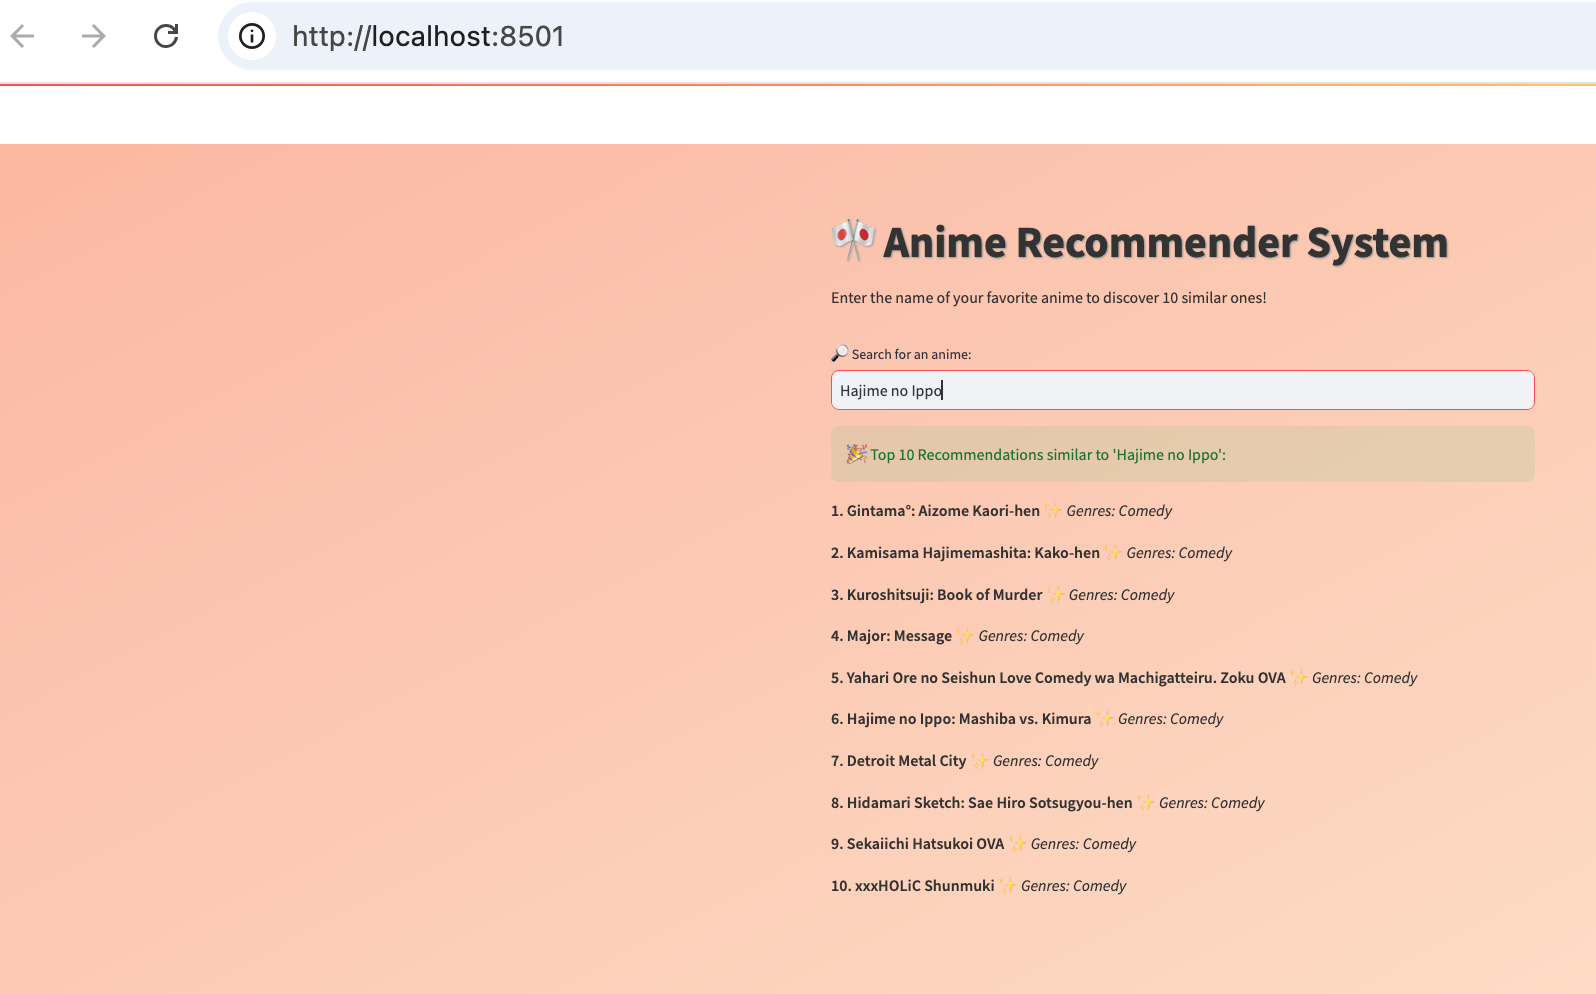